<a href="https://colab.research.google.com/github/HromovAndrey/II_mood_5_part_4_practic/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%B8%D0%B9_%D0%B7%D1%96%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання 1

Зробіть сегментацію для наступного зображення https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/cat.jpg

* завантежте модель `deeplabv3_resnet50` та відповідні ваги `DeepLabV3_ResNet50_Weights` [документація](https://pytorch.org/vision/stable/models/generated/torchvision.models.segmentation.deeplabv3_resnet50.html#deeplabv3-resnet50)
* застосуйте `transforms.Resize` до зображення
* застосуйте `transforms` з ваг до зображення
* змініть розмірність зображення на потрібну
* отримайте результат моделі
* застосуйте `draw_segmentation_masks`

In [4]:
import torch
from torchvision.io.image import read_image
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torchvision import transforms

In [5]:
img = read_image("/content/cat.jpg")

In [6]:
img = transforms.Resize((520, 520))(img)

In [7]:
weights = FCN_ResNet50_Weights.DEFAULT
model = fcn_resnet50(weights=weights)
model.eval()

Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth
100%|██████████| 135M/135M [00:02<00:00, 52.9MB/s]


FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [8]:
preprocess = weights.transforms(resize_size=None)

In [9]:
batch = preprocess(img)
batch = batch.unsqueeze(0)


In [10]:
with torch.no_grad():
  prediction = model(batch)["out"]

masks = prediction.argmax(dim=1)
mask = masks[0]

In [11]:

import matplotlib.pyplot as plt

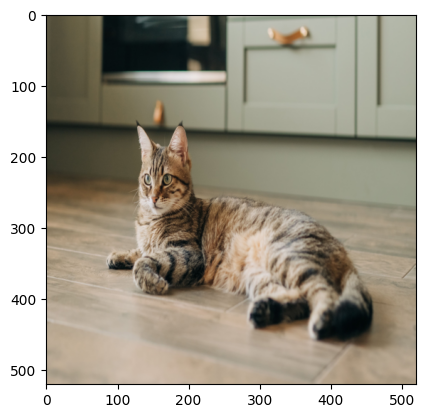

In [12]:
plt.imshow(img.permute(1, 2, 0))

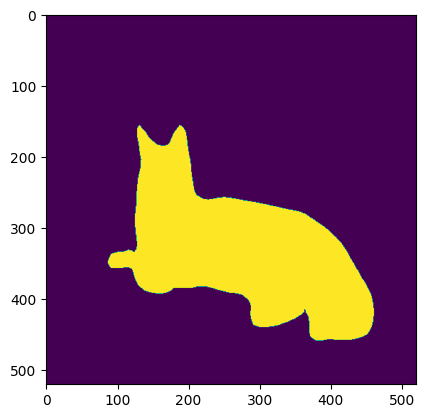

In [13]:
plt.imshow(mask)

In [14]:
mask.unique()

tensor([0, 8])

In [15]:
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
class_to_idx

{'__background__': 0,
 'aeroplane': 1,
 'bicycle': 2,
 'bird': 3,
 'boat': 4,
 'bottle': 5,
 'bus': 6,
 'car': 7,
 'cat': 8,
 'chair': 9,
 'cow': 10,
 'diningtable': 11,
 'dog': 12,
 'horse': 13,
 'motorbike': 14,
 'person': 15,
 'pottedplant': 16,
 'sheep': 17,
 'sofa': 18,
 'train': 19,
 'tvmonitor': 20}

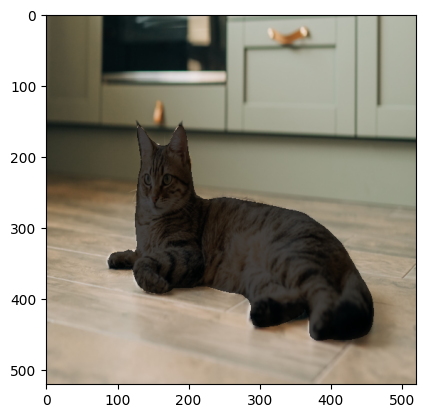

In [16]:
from torchvision.utils import draw_segmentation_masks

cat_mask = mask == class_to_idx['cat']

masked_img = draw_segmentation_masks(img, cat_mask, alpha=0.7)

plt.imshow(masked_img.permute(1, 2, 0))

In [17]:

img.shape

torch.Size([3, 520, 520])

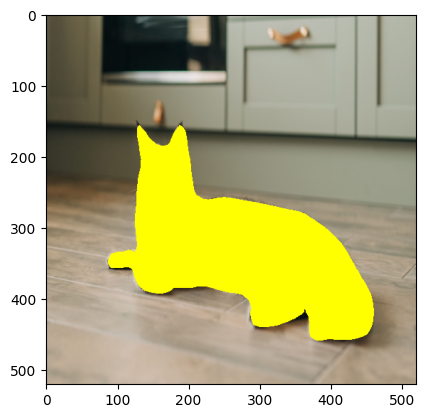

In [19]:
masked_img = img.clone() # копіювання
masked_img = masked_img.to(int) # зміна типу даних на int

yellow_pixel = torch.tensor([255, 255, 0])
masked_img[:, cat_mask] = yellow_pixel.view(-1, 1)

plt.imshow(masked_img.permute(1, 2, 0))

# Завдання 2

Проведіть виявлення об'єктів на даному зображенні https://www.thespruce.com/thmb/o_zAsNy0xWNWeq9xfWwAo6fhueo=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/SPR-luxury-kitchens-5211364-hero-688d716970544978bc12abdf17ce6f83.jpg

* Підберіть різні параметри `conf` та `iou` щоб подивитись на результат роботи моделі
* За допомогою параметра `classes` визначіть на зображенні лише:
  1. стільці
  2. бокали для вина
  3. рослини та вази